In [76]:
from io import StringIO

import os

import anndata
import numpy as np
import scanpy

# outdir = "/home/olga/googledrive/TabulaMicrocebus/data/cross-species"
outdir_gdrive = '/home/olga/googledrive/TabulaMicrocebus/data/human-lung-cell-atlas--from-kyle'
outdir_local = "/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/human-lung-cell-atlas--from-kyle"

outdirs = outdir_local, outdir_gdrive
import pandas as pd

# Human from Google Drive

In [2]:
! ls -lha $human_folder

total 30G
drwxrwxr-x 1 olga czb 4.0K Dec 13  2019 .
drwxrwxr-x 1 olga czb 4.0K Dec  2  2019 ..
-rw-rw-r-- 1 olga czb 6.5G Feb  5 14:51 droplet_normal_lung_blood_P1-3.h5ad
-rw-r--r-- 1 olga czb 6.2G Feb  5 15:02 droplet_normal_lung_blood_P1-3__no_duplicate_barcodes.h5ad
-rw-r--r-- 1 olga czb 6.2G Feb  5 15:06 droplet_normal_lung_blood_P1-3__no_duplicate_barcodes__minimal_obs.h5ad
-rw-r--r-- 1 olga czb 6.5G Feb  5 14:57 droplet_normal_lung_blood_P1-3__with_barcode_counts.h5ad
-rw-rw-r-- 1 olga czb  12M Oct 28  2019 droplet_normal_lung_blood_P1-3_metadata.csv
-rw-rw-r-- 1 olga czb 3.3G Oct 30  2019 droplet_normal_lung_blood_P1-3_ncbi_GCT.csv
-rw-rw-r-- 1 olga czb 1.1G Oct 28  2019 facs_normal_lung_blood_P1-3_gencode_GCT.csv
-rw-rw-r-- 1 olga czb 5.7M Oct 28  2019 facs_normal_lung_blood_P1-3_metadata.csv


In [59]:
%%time

h5ad = f"{human_folder}/droplet_normal_lung_blood_P1-3__no_duplicate_barcodes.h5ad"
human_no_duplicate_barcodes = scanpy.read(h5ad)


CPU times: user 661 ms, sys: 11.5 s, total: 12.2 s
Wall time: 1min 31s


# Add `narrow_group`, `broad_group`, `compartment_group`

## Simplify columns down to minimal set

In [60]:
obs_minimal = human_no_duplicate_barcodes.obs.rename(
    columns={
        "cell_barcode": "cell_barcode",
        "cell_ontology_class": "cell_ontology_class",
        "channel": "channel",
        "compartment": None,
        "free_annotation": "free_annotation",
        "location": None,
        "magnetic.selection": None,
        "nGene": "n_genes",
        "nUMI": "n_counts",
        "orig.ident": None,
        "patient": None,
        "individual": 'individual',
        "percent.ribo": None,
        "preparation.site": None,
        "region": None,
        "sample": None,
        "sequencing_run": "sequencing_run",
        "species": "species",
        "species_latin": "species_latin",
        "tissue": "tissue",
    }
)
obs_minimal = obs_minimal.loc[:, obs_minimal.columns.notnull()]
obs_minimal

,n_genes,n_counts,channel,tissue,free_annotation,cell_ontology_class,species,species_latin,sequencing_run,cell_barcode,individual,age,sex
index,,,,,,,,,,,,,
P2_1_AAACCTGAGAAACCAT,1347,2914,P2_1,Lung,Capillary Aerocyte,capillary endothelial cell,Human,Homo sapiens,180607_A00111_0155_BHFCWYDMXX,AAACCTGAGAAACCAT,human_2_hlca2,46y,male
P2_1_AAATGCCAGATGAGAG,1713,4226,P2_1,Lung,Capillary Aerocyte,capillary endothelial cell,Human,Homo sapiens,180607_A00111_0155_BHFCWYDMXX,AAATGCCAGATGAGAG,human_2_hlca2,46y,male
P2_1_AACACGTTCGATCCCT,1185,2152,P2_1,Lung,Capillary Aerocyte,capillary endothelial cell,Human,Homo sapiens,180607_A00111_0155_BHFCWYDMXX,AACACGTTCGATCCCT,human_2_hlca2,46y,male
P2_1_AACACGTTCGCACTCT,1378,3419,P2_1,Lung,Capillary Aerocyte,capillary endothelial cell,Human,Homo sapiens,180607_A00111_0155_BHFCWYDMXX,AACACGTTCGCACTCT,human_2_hlca2,46y,male
P2_1_AACCATGCAGCTCGCA,1210,2514,P2_1,Lung,Capillary Aerocyte,capillary endothelial cell,Human,Homo sapiens,180607_A00111_0155_BHFCWYDMXX,AACCATGCAGCTCGCA,human_2_hlca2,46y,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
P3_6_TGCGCAGTCCAAAGTC,1304,2521,P3_6,Lung,Pericyte,pericyte cell,Human,Homo sapiens,180607_A00111_0155_BHFCWYDMXX,TGCGCAGTCCAAAGTC,human_3_hlca3,51y,female
P3_6_TGGGAAGCATGACGGA,902,1387,P3_6,Lung,Pericyte,pericyte cell,Human,Homo sapiens,180607_A00111_0155_BHFCWYDMXX,TGGGAAGCATGACGGA,human_3_hlca3,51y,female
P3_7_AACTCCCCACTACAGT,651,1154,P3_7,Lung,Pericyte,pericyte cell,Human,Homo sapiens,180607_A00111_0155_BHFCWYDMXX,AACTCCCCACTACAGT,human_3_hlca3,51y,female


## Function to read unified annotations

In [61]:
%%file unified_annotations.py
import pandas as pd

def get_celltype_converter(
    tissue,
    column,
    xlsx="/home/olga/googledrive/TabulaMicrocebus/data/cross-species/unified_annotations/Cross_species_unified_annotations_Lung_Muscle_Blood.xlsx",
    group_cols=["narrow_group", "broad_group", "compartment_group"]
):
    sheet_name = f"{tissue}_10X"

    conversions = pd.read_excel(xlsx, sheet_name=sheet_name, header=[0, 1, 2])

    species_to_grouping = conversions.set_index(column)[group_cols]
    species_to_grouping.columns = species_to_grouping.columns.droplevel(level=[1, 2])
    species_to_grouping = species_to_grouping.loc[~species_to_grouping.index.duplicated()]
    species_to_grouping = species_to_grouping.loc[species_to_grouping.index.notnull()]
    species_to_grouping['tissue'] = tissue
    return species_to_grouping

Overwriting unified_annotations.py


In [62]:
import unified_annotations

blood_human_to_grouping = unified_annotations.get_celltype_converter('Blood', ("Human", "Human Lung Cell Atlas", "free_annotation"))
print(blood_human_to_grouping.shape)
blood_human_to_grouping.head()

(24, 4)


,narrow_group,broad_group,compartment_group,tissue
"(Human, Human Lung Cell Atlas, free_annotation)",,,,
B,B cell,B cell,lymphoid,Blood
Plasma,plasma cell,plasma cell,lymphoid,Blood
CD4+ Memory/Effector T,CD4+ T cell,T cell,lymphoid,Blood
CD4+ Naive T,CD4+ T cell,T cell,lymphoid,Blood
CD8+ Memory/Effector T,CD8+ T cell,T cell,lymphoid,Blood


## Get lung to cell grouping

In [63]:
lung_human_to_grouping = unified_annotations.get_celltype_converter('Lung', ("Human", "Human Lung Cell Atlas", "free_annotation"))
print(lung_human_to_grouping.shape)
lung_human_to_grouping.head()

(57, 4)


,narrow_group,broad_group,compartment_group,tissue
"(Human, Human Lung Cell Atlas, free_annotation)",,,,
Adventitial Fibroblast,adventitial fibroblast,fibroblast,stromal,Lung
Alveolar Fibroblast,alveolar fibroblast,fibroblast,stromal,Lung
Lipofibroblast,lipofibroblast,fibroblast,stromal,Lung
Mesothelial,mesothelial cell,mesothelial cell,stromal,Lung
Airway Smooth Muscle,airway associated smooth muscle cell,airway associated smooth muscle cell,stromal,Lung


## Separately convert lung and blood

### Lung

In [64]:
obs_minimal_lung = obs_minimal.query('tissue == "Lung"')
obs_minimal_lung_merged = obs_minimal_lung.merge(lung_human_to_grouping, left_on='free_annotation', right_index=True)
obs_minimal_lung_merged.head()

,n_genes,n_counts,channel,tissue_x,free_annotation,cell_ontology_class,species,species_latin,sequencing_run,cell_barcode,individual,age,sex,narrow_group,broad_group,compartment_group,tissue_y
index,,,,,,,,,,,,,,,,,
P2_1_AAACCTGAGAAACCAT,1347,2914,P2_1,Lung,Capillary Aerocyte,capillary endothelial cell,Human,Homo sapiens,180607_A00111_0155_BHFCWYDMXX,AAACCTGAGAAACCAT,human_2_hlca2,46y,male,capillary aerocyte cell,capillary cell,endothelial,Lung
P2_1_AAATGCCAGATGAGAG,1713,4226,P2_1,Lung,Capillary Aerocyte,capillary endothelial cell,Human,Homo sapiens,180607_A00111_0155_BHFCWYDMXX,AAATGCCAGATGAGAG,human_2_hlca2,46y,male,capillary aerocyte cell,capillary cell,endothelial,Lung
P2_1_AACACGTTCGATCCCT,1185,2152,P2_1,Lung,Capillary Aerocyte,capillary endothelial cell,Human,Homo sapiens,180607_A00111_0155_BHFCWYDMXX,AACACGTTCGATCCCT,human_2_hlca2,46y,male,capillary aerocyte cell,capillary cell,endothelial,Lung
P2_1_AACACGTTCGCACTCT,1378,3419,P2_1,Lung,Capillary Aerocyte,capillary endothelial cell,Human,Homo sapiens,180607_A00111_0155_BHFCWYDMXX,AACACGTTCGCACTCT,human_2_hlca2,46y,male,capillary aerocyte cell,capillary cell,endothelial,Lung
P2_1_AACCATGCAGCTCGCA,1210,2514,P2_1,Lung,Capillary Aerocyte,capillary endothelial cell,Human,Homo sapiens,180607_A00111_0155_BHFCWYDMXX,AACCATGCAGCTCGCA,human_2_hlca2,46y,male,capillary aerocyte cell,capillary cell,endothelial,Lung


### Blood

In [65]:
obs_minimal_blood = obs_minimal.query('tissue == "Blood"')
obs_minimal_blood_merged = obs_minimal_lung.merge(blood_human_to_grouping, left_on='free_annotation', right_index=True)
obs_minimal_blood_merged.head()

,n_genes,n_counts,channel,tissue_x,free_annotation,cell_ontology_class,species,species_latin,sequencing_run,cell_barcode,individual,age,sex,narrow_group,broad_group,compartment_group,tissue_y
index,,,,,,,,,,,,,,,,,
P2_1_AAACCTGAGAGACTAT,2181,6673,P2_1,Lung,IGSF21+ Dendritic,dendritic cell,Human,Homo sapiens,180607_A00111_0155_BHFCWYDMXX,AAACCTGAGAGACTAT,human_2_hlca2,46y,male,IGSF21+ dendritic cell,dendritic cell,myeloid,Blood
P2_1_AGCAGCCCAAAGGCGT,1059,2305,P2_1,Lung,IGSF21+ Dendritic,dendritic cell,Human,Homo sapiens,180607_A00111_0155_BHFCWYDMXX,AGCAGCCCAAAGGCGT,human_2_hlca2,46y,male,IGSF21+ dendritic cell,dendritic cell,myeloid,Blood
P2_1_AGGCCGTCAGTCACTA,1536,4097,P2_1,Lung,IGSF21+ Dendritic,dendritic cell,Human,Homo sapiens,180607_A00111_0155_BHFCWYDMXX,AGGCCGTCAGTCACTA,human_2_hlca2,46y,male,IGSF21+ dendritic cell,dendritic cell,myeloid,Blood
P2_1_AGTAGTCTCCCTTGTG,1871,6562,P2_1,Lung,IGSF21+ Dendritic,dendritic cell,Human,Homo sapiens,180607_A00111_0155_BHFCWYDMXX,AGTAGTCTCCCTTGTG,human_2_hlca2,46y,male,IGSF21+ dendritic cell,dendritic cell,myeloid,Blood
P2_1_CATGACATCCGAACGC,1232,2441,P2_1,Lung,IGSF21+ Dendritic,dendritic cell,Human,Homo sapiens,180607_A00111_0155_BHFCWYDMXX,CATGACATCCGAACGC,human_2_hlca2,46y,male,IGSF21+ dendritic cell,dendritic cell,myeloid,Blood


## Concatenate lung and blood

In [66]:
new_obs = pd.concat([obs_minimal_blood_merged, obs_minimal_lung_merged])

# Drop all `_x` columns
cols_to_drop = [x for x in new_obs.columns if x.endswith('_x')]
new_obs = new_obs.drop(cols_to_drop, axis=1)

# Rename all `_y` columns
col_renamer = {x: x.split('_y')[0] for x in new_obs.columns if x.endswith('_y')}
new_obs = new_obs.rename(columns=col_renamer)


new_obs.head()

,n_genes,n_counts,channel,free_annotation,cell_ontology_class,species,species_latin,sequencing_run,cell_barcode,individual,age,sex,narrow_group,broad_group,compartment_group,tissue
index,,,,,,,,,,,,,,,,
P2_1_AAACCTGAGAGACTAT,2181,6673,P2_1,IGSF21+ Dendritic,dendritic cell,Human,Homo sapiens,180607_A00111_0155_BHFCWYDMXX,AAACCTGAGAGACTAT,human_2_hlca2,46y,male,IGSF21+ dendritic cell,dendritic cell,myeloid,Blood
P2_1_AGCAGCCCAAAGGCGT,1059,2305,P2_1,IGSF21+ Dendritic,dendritic cell,Human,Homo sapiens,180607_A00111_0155_BHFCWYDMXX,AGCAGCCCAAAGGCGT,human_2_hlca2,46y,male,IGSF21+ dendritic cell,dendritic cell,myeloid,Blood
P2_1_AGGCCGTCAGTCACTA,1536,4097,P2_1,IGSF21+ Dendritic,dendritic cell,Human,Homo sapiens,180607_A00111_0155_BHFCWYDMXX,AGGCCGTCAGTCACTA,human_2_hlca2,46y,male,IGSF21+ dendritic cell,dendritic cell,myeloid,Blood
P2_1_AGTAGTCTCCCTTGTG,1871,6562,P2_1,IGSF21+ Dendritic,dendritic cell,Human,Homo sapiens,180607_A00111_0155_BHFCWYDMXX,AGTAGTCTCCCTTGTG,human_2_hlca2,46y,male,IGSF21+ dendritic cell,dendritic cell,myeloid,Blood
P2_1_CATGACATCCGAACGC,1232,2441,P2_1,IGSF21+ Dendritic,dendritic cell,Human,Homo sapiens,180607_A00111_0155_BHFCWYDMXX,CATGACATCCGAACGC,human_2_hlca2,46y,male,IGSF21+ dendritic cell,dendritic cell,myeloid,Blood


In [67]:
pd.options.display.max_rows = 100

In [68]:
new_obs.groupby(['tissue', 'free_annotation', 'narrow_group']).size()

tissue  free_annotation                       narrow_group                            
Blood   B                                     B cell                                        237
        Basophil/Mast 1                       basophil                                     1275
        Basophil/Mast 2                       basophil                                      523
        CD4+ Memory/Effector T                CD4+ T cell                                  2269
        CD4+ Naive T                          CD4+ T cell                                   274
        CD8+ Memory/Effector T                CD8+ T cell                                   733
        CD8+ Naive T                          CD8+ T cell                                  1335
        Classical Monocyte                    monocyte                                      949
        EREG+ Dendritic                       EREG+ dendritic cell                          130
        IGSF21+ Dendritic                     IGS

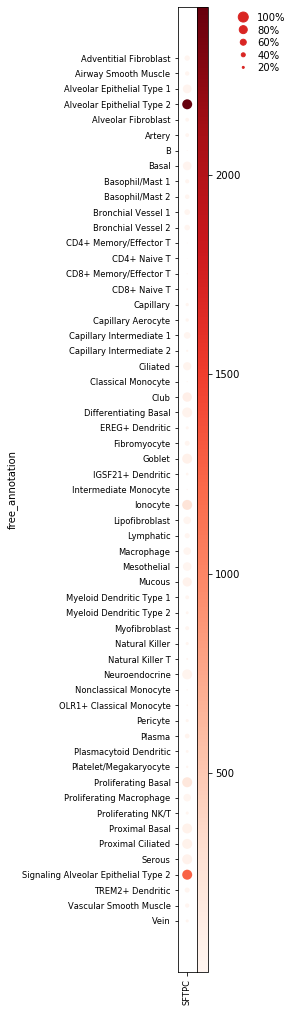

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[0.35, 0, 0.2, 0.5, 0.25])

In [69]:
scanpy.pl.dotplot(human_no_duplicate_barcodes, var_names=['SFTPC'], groupby='free_annotation')

In [70]:
human_no_duplicate_barcodes_copy = human_no_duplicate_barcodes.copy()
human_no_duplicate_barcodes_copy = human_no_duplicate_barcodes[new_obs.index]
human_no_duplicate_barcodes_copy.obs = new_obs


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [71]:
human_no_duplicate_barcodes_copy

AnnData object with n_obs × n_vars = 85623 × 26485 
    obs: 'n_genes', 'n_counts', 'channel', 'free_annotation', 'cell_ontology_class', 'species', 'species_latin', 'sequencing_run', 'cell_barcode', 'individual', 'age', 'sex', 'narrow_group', 'broad_group', 'compartment_group', 'tissue'

### Check SFTPC for sanity

... storing 'free_annotation' as categorical
... storing 'narrow_group' as categorical
... storing 'broad_group' as categorical
... storing 'compartment_group' as categorical
... storing 'tissue' as categorical


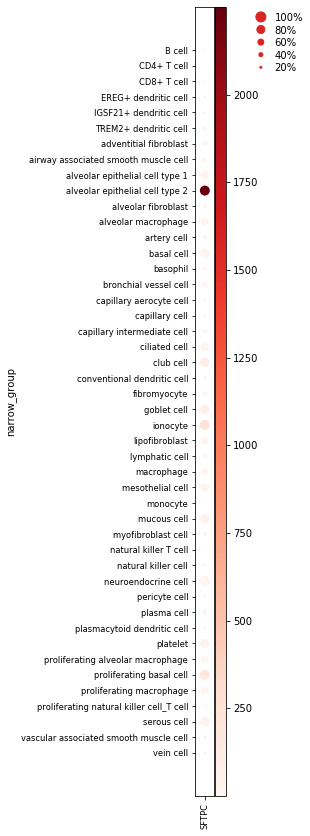

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[0.35, 0, 0.2, 0.5, 0.25])

In [72]:
scanpy.pl.dotplot(human_no_duplicate_barcodes_copy, var_names=['SFTPC'], groupby='narrow_group')

In [77]:
%%time

for outdir in outdirs:
    print(f'outdir: {outdir}')
    h5ad = os.path.join(outdir, "droplet_normal_lung_blood_P1-3__no_duplicate_barcodes__minimal_obs.h5ad")
    %time human_no_duplicate_barcodes_copy.write(h5ad)

outdir: /home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/human-lung-cell-atlas--from-kyle
CPU times: user 1.7 s, sys: 6.57 s, total: 8.27 s
Wall time: 14.6 s
outdir: /home/olga/googledrive/TabulaMicrocebus/data/human-lung-cell-atlas--from-kyle
CPU times: user 1.83 s, sys: 8.05 s, total: 9.88 s
Wall time: 3min 50s
CPU times: user 3.52 s, sys: 14.6 s, total: 18.2 s
Wall time: 4min 4s


In [30]:
human_no_duplicate_barcodes_copy.obs.individual.value_counts()

human_2_hlca2    26894
human_3_hlca3    25382
human_1_hlca1     9554
Name: individual, dtype: int64

In [33]:
human_no_duplicate_barcodes_copy

AnnData object with n_obs × n_vars = 61830 × 26485 
    obs: 'n_genes', 'n_counts', 'channel', 'tissue', 'free_annotation', 'cell_ontology_class', 'species', 'species_latin', 'sequencing_run', 'cell_barcode', 'individual', 'age', 'sex', 'narrow_group', 'broad_group', 'compartment_group'

In [34]:
def check_celltype_presence(adata, celltypes=('alveolar fibroblast', ), celltype_col='narrow_group'):
    for celltype in celltypes:
        assert celltype in set(adata.obs[celltype_col])

check_celltype_presence(human_no_duplicate_barcodes_copy)